In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading WD layercounts
new_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Updated_WD2014 Layer Count.tab', sep='\t', comment='#', names=['depth', 'age'])
new_wdc_count['age'] = new_wdc_count['age'] * 1000
old_wdc_count = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/WDC/WD2014 Layer Count.tab', sep='\t', skiprows=52)
old_wdc_count['age'] = old_wdc_count['Cal age [ka BP] (ice age)']*1000

#loading EDML layercounts
EDML_reset_depth = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_LayerCount_Revised.txt', sep='\t', comment='#')
edml_gicc05 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=0, skiprows=1, usecols=[0,1])
edml_gicc05['yr b1950'] = edml_gicc05['Year b2k'] - 50
edml_half = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/Data Files/EDML Layer Count.xlsx', sheet_name=1, skiprows=1)
edml_half['yr b1950'] = edml_half['Year b2k'] - 50

#load GICC21 layercount
gicc21 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC21.xlsx', sheet_name=1, skiprows=1, usecols=[0,6,8], names=['age', 'ngrip m', 'grip m'])
gicc21['age'] = gicc21['age'] - 50

#tiepoints
ngrip_edml_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/EDML LC/EDML-GICC Errors/EDML_GICC_Compare.xlsx', sheet_name=0, skiprows=0, usecols= [0,2], names=['EDML m', 'NGRIP m'])
grip_wdc_ties = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision Work/WD LC/Modified_WDC_GICC_Compare.xlsx', sheet_name=0, skiprows=0, usecols= [0,1], names=['WDC m', 'GRIP m'])

#interpolations
ngrip_edml_ties['new_edml age'] = np.interp(ngrip_edml_ties['EDML m'], EDML_reset_depth['Depth (m)'], EDML_reset_depth['age (b1950)'])
ngrip_edml_ties['old_edml age'] = np.interp(ngrip_edml_ties['EDML m'], edml_half['Depth (m)'], edml_half['yr b1950'])
ngrip_edml_ties['gicc21 age'] = np.interp(ngrip_edml_ties['NGRIP m'], gicc21['ngrip m'], gicc21['age'])

grip_wdc_ties['new_wdc age'] = np.interp(grip_wdc_ties['WDC m'], new_wdc_count['depth'], new_wdc_count['age'])
grip_wdc_ties['old_wdc age'] = np.interp(grip_wdc_ties['WDC m'], old_wdc_count['#Depth ice/snow [m]'], old_wdc_count['age'])
grip_wdc_ties['gicc21 age'] = np.interp(grip_wdc_ties['GRIP m'], gicc21['grip m'], gicc21['age'])


In [14]:
ngrip_edml_ties

,EDML m,NGRIP m,new_edml age,old_edml age,gicc21 age
0,117.71,265.32,1269.090909,1270.090909,1267.216667
1,125.25,284.21,1375.781609,1376.281609,1374.607143
2,127.65,290.21,1410.801653,1411.454545,1408.576923
3,143.58,331.21,1645.663366,1636.663366,1643.236111
4,146.15,337.42,1682.396226,1672.396226,1680.652778
5,148.27,342.27,1711.491935,1702.015625,1709.916667
6,152.87,353.26,1778.159091,1765.159091,1774.535714
7,173.84,406.79,2089.276923,2076.776923,2087.994048
8,175.32,410.73,2114.087500,2100.087500,2112.735714
9,192.75,453.00,2372.765957,2355.765957,2373.626984


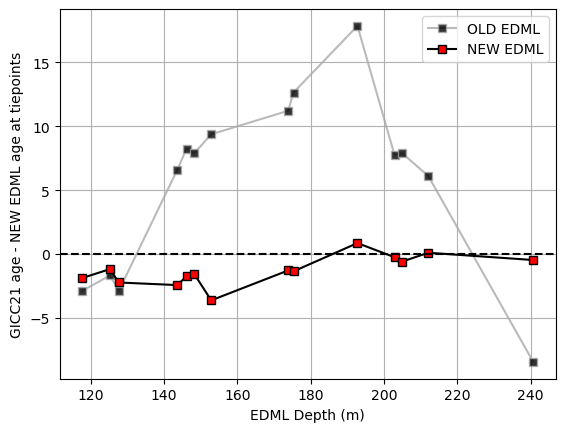

In [16]:
#LC comparison check 1

plt.plot(ngrip_edml_ties['EDML m'], (ngrip_edml_ties['gicc21 age'] - ngrip_edml_ties['old_edml age']), marker='s', mfc='k', linestyle='-', color='darkgrey', alpha=0.8, label='OLD EDML')
plt.plot(ngrip_edml_ties['EDML m'], (ngrip_edml_ties['gicc21 age'] - ngrip_edml_ties['new_edml age']), marker='s', mfc='r', linestyle='-', color='k', label='NEW EDML')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC21 age - NEW EDML age at tiepoints')
plt.xlabel('EDML Depth (m)')
#plt.ylim(-15,5)
plt.grid()
plt.legend()

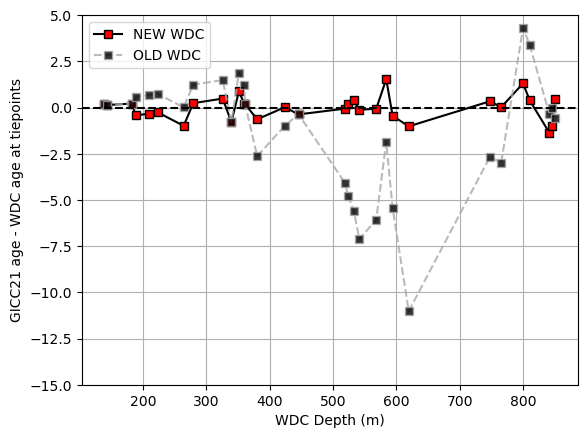

In [17]:
plt.plot(grip_wdc_ties['WDC m'], (grip_wdc_ties['gicc21 age'] - grip_wdc_ties['new_wdc age']), marker='s', mfc='r', linestyle='-', color='k', label='NEW WDC')
plt.plot(grip_wdc_ties['WDC m'], (grip_wdc_ties['gicc21 age'] - grip_wdc_ties['old_wdc age']), marker='s', mfc='k', linestyle='--', color='darkgrey', alpha=0.8, label='OLD WDC')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('GICC21 age - WDC age at tiepoints')
plt.xlabel('WDC Depth (m)')
plt.ylim(-15,5)
plt.grid()
plt.legend()